<a href="https://colab.research.google.com/github/Rajmanandhar206/SHADOW_FOX/blob/main/Store_Sales_and_Profit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, specifying the encoding as 'latin-1'
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1') # Or try 'iso-8859-1' if 'latin-1' doesn't work


In [10]:
## 1. Basic Overview
print("Dataset Overview:")
print(f"Number of records: {len(df)}")
print(f"Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Total sales: ${df['Sales'].sum():,.2f}")
print(f"Total profit: ${df['Profit'].sum():,.2f}")
print(f"Profit margin: {df['Profit'].sum()/df['Sales'].sum()*100:.2f}%")


Dataset Overview:
Number of records: 9994
Date range: 1/1/2017 to 9/9/2017
Total sales: $2,297,200.86
Total profit: $286,397.02
Profit margin: 12.47%


In [11]:
## 2. Sales and Profit by Category
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
category_perf['Profit Margin'] = category_perf['Profit'] / category_perf['Sales'] * 100

print("\nPerformance by Category:")
print(category_perf)


Performance by Category:
                       Sales       Profit  Profit Margin
Category                                                
Technology       836154.0330  145454.9481      17.395712
Furniture        741999.7953   18451.2728       2.486695
Office Supplies  719047.0320  122490.8008      17.035158


In [12]:
## 3. Sales and Profit by Sub-Category
subcategory_perf = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
subcategory_perf['Profit Margin'] = subcategory_perf['Profit'] / subcategory_perf['Sales'] * 100

print("\nTop 10 Sub-Categories by Sales:")
print(subcategory_perf.head(10))


Top 10 Sub-Categories by Sales:
                    Sales      Profit  Profit Margin
Sub-Category                                        
Phones        330007.0540  44515.7306      13.489327
Chairs        328449.1030  26590.1663       8.095673
Storage       223843.6080  21278.8264       9.506113
Tables        206965.5320 -17725.4811      -8.564460
Binders       203412.7330  30221.7633      14.857361
Machines      189238.6310   3384.7569       1.788618
Accessories   167380.3180  41936.6357      25.054700
Copiers       149528.0300  55617.8249      37.195585
Bookcases     114879.9963  -3472.5560      -3.022768
Appliances    107532.1610  18138.0054      16.867517


In [13]:
## 4. Regional Performance
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
region_perf['Profit Margin'] = region_perf['Profit'] / region_perf['Sales'] * 100

print("\nPerformance by Region:")
print(region_perf)



Performance by Region:
               Sales       Profit  Profit Margin
Region                                          
West     725457.8245  108418.4489      14.944831
East     678781.2400   91522.7800      13.483399
Central  501239.8908   39706.3625       7.921629
South    391721.9050   46749.4303      11.934342


In [14]:
## 5. Customer Segment Analysis
segment_perf = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
segment_perf['Profit Margin'] = segment_perf['Profit'] / segment_perf['Sales'] * 100

print("\nPerformance by Customer Segment:")
print(segment_perf)


Performance by Customer Segment:
                    Sales       Profit  Profit Margin
Segment                                              
Consumer     1.161401e+06  134119.2092      11.548050
Corporate    7.061464e+05   91979.1340      13.025506
Home Office  4.296531e+05   60298.6785      14.034269


In [15]:
## 6. Time Series Analysis
# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['YearMonth'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['Sales'].sum()
monthly_profit = df.groupby('YearMonth')['Profit'].sum()

In [16]:
## 7. Discount Impact Analysis
discount_analysis = df.groupby(pd.cut(df['Discount'], bins=[-0.1, 0, 0.2, 0.5, 1]))[['Sales', 'Profit']].mean()
discount_analysis['Profit Margin'] = discount_analysis['Profit'] / discount_analysis['Sales'] * 100

print("\nImpact of Discount Levels:")
print(discount_analysis)


Impact of Discount Levels:
                  Sales      Profit  Profit Margin
Discount                                          
(-0.1, 0.0]  226.742074   66.900292      29.505019
(0.0, 0.2]   222.593279   26.501571      11.905827
(0.2, 0.5]   555.943039 -109.528873     -19.701456
(0.5, 1.0]    75.033572  -89.438144    -119.197502


<ipython-input-16-13094a06a605>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby(pd.cut(df['Discount'], bins=[-0.1, 0, 0.2, 0.5, 1]))[['Sales', 'Profit']].mean()


In [17]:
## 8. Top/Lowest Performing Products
top_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print("\nTop 5 Products by Sales:")
print(top_products.head(5))

low_profit_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Profit')
print("\n5 Lowest Profit Products:")
print(low_profit_products.head(5))

## Visualization
plt.figure(figsize=(15, 10))


Top 5 Products by Sales:
                                                        Sales        Profit
Product Name                                                               
Canon imageCLASS 2200 Advanced Copier               61599.824  2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384  7.753039e+03
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1.811078e+03
HON 5400 Series Task Chairs for Big and Tall        21870.576  5.684342e-14
GBC DocuBind TL300 Electric Binding System          19823.479  2.233505e+03

5 Lowest Profit Products:
                                                        Sales     Profit
Product Name                                                            
Cubify CubeX 3D Printer Double Head Print           11099.963 -8879.9704
Lexmark MX611dhe Monochrome Laser Printer           16829.901 -4589.9730
Cubify CubeX 3D Printer Triple Head Print            7999.980 -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Table...

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Phones'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Storage'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Binders'),
  Text(5, 0, 'Machines'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Copiers'),
  Text(8, 0, 'Bookcases'),
  Text(9, 0, 'Appliances')])

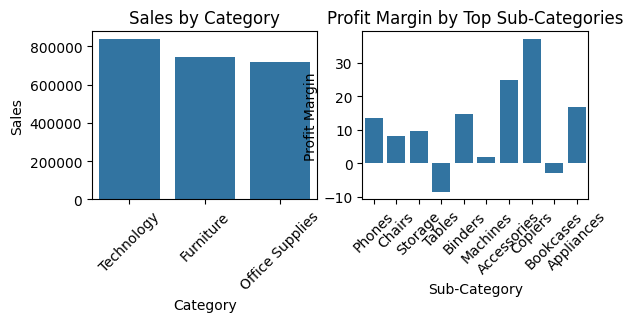

In [18]:
# Sales by Category
plt.subplot(2, 2, 1)
sns.barplot(x=category_perf.index, y='Sales', data=category_perf)
plt.title('Sales by Category')
plt.xticks(rotation=45)

# Profit Margin by Sub-Category
plt.subplot(2, 2, 2)
top_subcats = subcategory_perf.head(10)
sns.barplot(x=top_subcats.index, y='Profit Margin', data=top_subcats)
plt.title('Profit Margin by Top Sub-Categories')
plt.xticks(rotation=45)


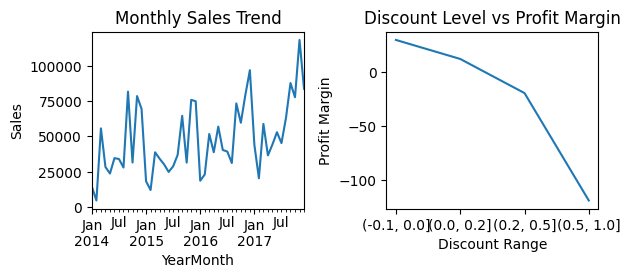

In [19]:
# Monthly Sales Trend
plt.subplot(2, 2, 3)
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')

# Discount vs Profit Margin
plt.subplot(2, 2, 4)
sns.lineplot(x=discount_analysis.index.astype(str), y='Profit Margin', data=discount_analysis)
plt.title('Discount Level vs Profit Margin')
plt.xlabel('Discount Range')

plt.tight_layout()
plt.show()